## Issue: Model is predicting planes will be minimum 63 minutes late, even if selected features are zero.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Airline.csv')
print (df.head(3))

   year   month carrier       carrier_name airport  \
0  2018      12      9E  Endeavor Air Inc.     ABE   
1  2018      12      9E  Endeavor Air Inc.     AEX   
2  2018      12      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         54.0       12.0   
1           Alexandria, LA: Alexandria International        109.0       20.0   
2        Augusta, GA: Augusta Regional at Bush Field        144.0       36.0   

   carrier_ct   weather_ct         ...           security_ct  \
0        7.11         0.00         ...                   0.0   
1        8.24         4.51         ...                   0.0   
2       16.60         4.28         ...                   0.0   

   late_aircraft_ct  arr_cancelled  arr_diverted   arr_delay   carrier_delay  \
0              3.17            0.0           1.0       755.0           460.0   
1              3.85            2.0           

In [18]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1727.0,1727.0,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,2018.0,12.0,344.056779,62.967555,18.187080,1.709455,20.361802,0.163048,22.546419,3.911935,0.783893,3807.315180,1235.599073,188.470452,866.230591,6.946118,1510.068946
std,0.0,0.0,954.065470,163.849129,43.418824,4.532824,62.536561,0.685127,63.665818,17.752577,2.731713,10331.553858,3218.777105,695.462874,3090.224226,31.509796,4188.885065
min,2018.0,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,12.0,44.000000,7.000000,2.100000,0.000000,1.462500,0.000000,1.865000,0.000000,0.000000,368.500000,107.250000,0.000000,48.000000,0.000000,91.000000
50%,2018.0,12.0,92.000000,17.000000,5.515000,0.540000,4.400000,0.000000,5.410000,0.000000,0.000000,1022.500000,346.000000,22.000000,156.000000,0.000000,357.000000
75%,2018.0,12.0,224.750000,42.000000,14.207500,1.720000,12.127500,0.000000,13.872500,3.000000,1.000000,2550.250000,972.000000,133.750000,437.750000,0.000000,975.500000
max,2018.0,12.0,19224.000000,2296.000000,537.710000,71.790000,983.900000,9.370000,718.160000,453.000000,63.000000,149112.000000,46184.000000,11925.000000,51405.000000,443.000000,55248.000000


In [19]:
df.columns = df.columns.str.replace(' ','')


In [20]:
df.isna()

print('Null weather ct:', df[df['weather_ct'].isna()])


Null weather ct:      year  month carrier              carrier_name airport  \
569  2018     12      EV  ExpressJet Airlines Inc.     LNK   

                     airport_name  arr_flights  arr_del15  carrier_ct  \
569  Lincoln, NE: Lincoln Airport          NaN        NaN         NaN   

     weather_ct         ...           security_ct  late_aircraft_ct  \
569         NaN         ...                   NaN               NaN   

     arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
569            NaN           NaN        NaN            NaN            NaN   

     nas_delay  security_delay  late_aircraft_delay  
569        NaN             NaN                  NaN  

[1 rows x 21 columns]


In [21]:
df = df.dropna()

In [22]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1726.0,1726.0,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,2018.0,12.0,344.056779,62.967555,18.187080,1.709455,20.361802,0.163048,22.546419,3.911935,0.783893,3807.315180,1235.599073,188.470452,866.230591,6.946118,1510.068946
std,0.0,0.0,954.065470,163.849129,43.418824,4.532824,62.536561,0.685127,63.665818,17.752577,2.731713,10331.553858,3218.777105,695.462874,3090.224226,31.509796,4188.885065
min,2018.0,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,12.0,44.000000,7.000000,2.100000,0.000000,1.462500,0.000000,1.865000,0.000000,0.000000,368.500000,107.250000,0.000000,48.000000,0.000000,91.000000
50%,2018.0,12.0,92.000000,17.000000,5.515000,0.540000,4.400000,0.000000,5.410000,0.000000,0.000000,1022.500000,346.000000,22.000000,156.000000,0.000000,357.000000
75%,2018.0,12.0,224.750000,42.000000,14.207500,1.720000,12.127500,0.000000,13.872500,3.000000,1.000000,2550.250000,972.000000,133.750000,437.750000,0.000000,975.500000
max,2018.0,12.0,19224.000000,2296.000000,537.710000,71.790000,983.900000,9.370000,718.160000,453.000000,63.000000,149112.000000,46184.000000,11925.000000,51405.000000,443.000000,55248.000000


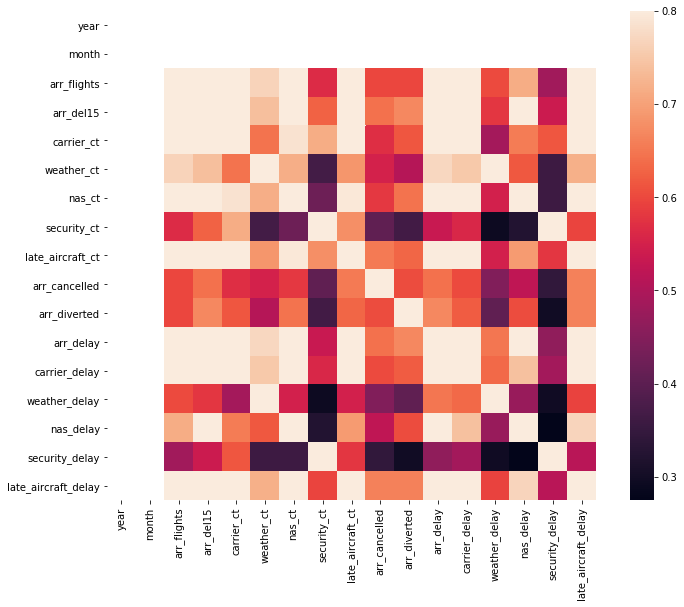

In [23]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [24]:
df['carrier'].unique()


array(['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK',
       'OH', 'OO', 'UA', 'WN', 'YV', 'YX'], dtype=object)

In [25]:
target = df['arr_delay'].values.reshape(-1,1)
data = df[['arr_del15', 'carrier_ct', 'weather_ct']]


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state = 20)


In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(data)
print (regr.coef_)
print (regr.intercept_)
print (regr.score(x_train, y_train))
print ("X= {} Y= {}".format(x_train, y_pred))


[[  90.07043695 -119.07542671  177.40198819]]
[63.34360433]
0.9646379611263793
X=       arr_del15  carrier_ct  weather_ct
1588       47.0       18.93        1.31
1168       78.0       14.27        0.20
551        17.0        5.24        0.11
1333       22.0        6.62        1.30
409         0.0        0.00        0.00
1120      447.0       81.02       29.62
1313       69.0       14.67        0.00
612        66.0       22.92        0.00
875        21.0        2.88        4.06
740         2.0        0.38        0.00
1709       10.0        1.09        0.00
1006       82.0       21.19        2.71
400       336.0      113.93       14.27
1033        6.0        2.85        0.00
1257       10.0        2.69        0.00
35          0.0        0.00        0.00
1421       74.0       20.19        2.21
842        27.0        8.96        1.80
1247        5.0        0.97        0.00
1656      138.0       36.23        4.38
244        33.0       12.52        0.00
864        25.0        5.69        0.3

In [38]:
df['y_pred'] = y_pred

In [40]:
data = df[['arr_del15', 'carrier_ct', 'weather_ct', 'y_pred']]
print(data)


      arr_del15  carrier_ct  weather_ct        y_pred
0          12.0        7.11        0.00    297.562564
1          20.0        8.24        4.51   1683.653794
2          36.0       16.60        4.28   2088.507761
3           0.0        0.00        0.00     63.343604
4         588.0      101.09       22.44  44968.326259
5           6.0        1.51        0.74    555.239803
6           6.0        1.02        0.00    482.309291
7          12.0        3.80        0.41    764.437041
8           5.0        1.00        1.00    572.022351
9          14.0        5.40        0.36    745.187133
10         14.0        2.60        0.00   1014.733612
11         15.0        5.51        0.69    880.701929
12          1.0        0.00        0.88    309.527791
13          7.0        4.87        0.89    271.827104
14         13.0        7.49        1.00    519.786327
15         79.0       11.29        1.00   6011.948544
16         20.0        5.04        0.43   1340.895048
17         40.0        8.72 

In [43]:
#Inaccurately predicts first line but first line may also just be a rare instance?
pred_first_line = [[12, 7.11, 0]]

regr.predict(pred_first_line)

array([[297.56256382]])